In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 

In [4]:
X.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [6]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [7]:
y.value_counts()

Class
0        2788
1        1813
Name: count, dtype: int64

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [9]:
pca.explained_variance_ratio_

array([0.92702701, 0.07104297])

In [10]:
(0.927+0.071)*100

99.8

In [11]:
X2D.shape

(4601, 2)

In [12]:
datos = np.hstack((X2D, y))
datos.shape

(4601, 3)

In [13]:
datos = pd.DataFrame(datos, columns=['z1', 'z2', 'y'])
datos.sample(n=10)

,z1,z2,y
1013,502.472143,261.887699,1.0
2453,-258.768674,-6.022000,0.0
2882,-244.952628,3.941588,0.0
4193,-144.527607,22.583203,0.0
2907,-247.258024,14.488951,0.0
2276,115.577527,26.225123,0.0
735,36.971649,47.262461,1.0
429,-161.764011,-13.986860,1.0
368,-149.272231,-18.129855,1.0
2349,-264.029148,-1.073305,0.0


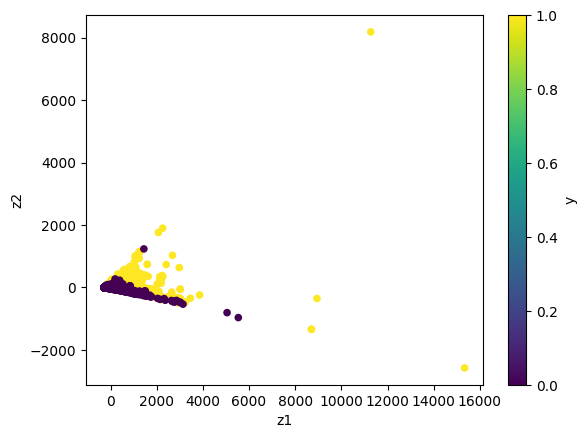

In [14]:
datos.plot.scatter(x='z1', y='z2', c='y')
plt.show()

In [15]:
from scipy import stats
datos = datos[(np.abs(stats.zscore(datos)) < 3).all(axis=1)]

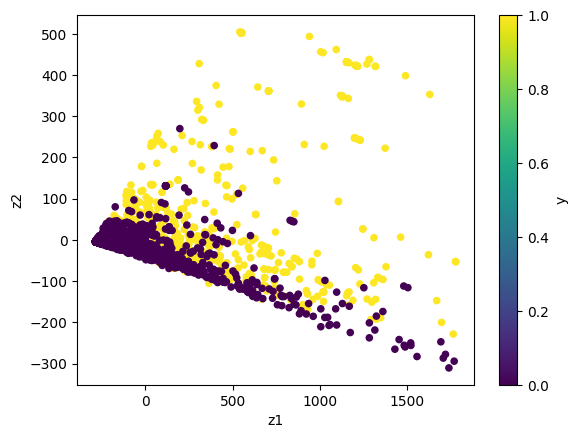

In [16]:
datos.plot.scatter(x='z1', y='z2', c='y')
plt.show()

In [17]:
y = datos[['y']]
X = datos.drop('y', axis=1)
X.shape, y.shape

((4493, 2), (4493, 1))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((3819, 2), (674, 2))

In [19]:
y_train, y_test = train_test_split(y, test_size=0.15, random_state=42)

y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)
y_train.shape, y_test.shape

((3819,), (674,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [23]:
#capa de entrada: 2 neuronas
#primer capa oculta: 5, 10 neuronas
#segunda capa oculta: 5, 10 neuronas
#capa de salida: 1 neurona
param_grid = [
    {'hidden_layer_sizes': [(5,5), (10,10)],
     'learning_rate_init': [0.005, 0.01],
     'momentum': [0.5, 0.9]
    }
]

In [24]:
#Configurar el modelo a utilizar, junto con su lista de hiper-params
model = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
model.fit(X_train_scaled, y_train)
print("Mejor hiper-param conf.", model.best_params_)

Mejor hiper-param conf. {'hidden_layer_sizes': (10, 10), 'learning_rate_init': 0.005, 'momentum': 0.9}


In [25]:
y_pred = model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[339,  63],
       [109, 163]])

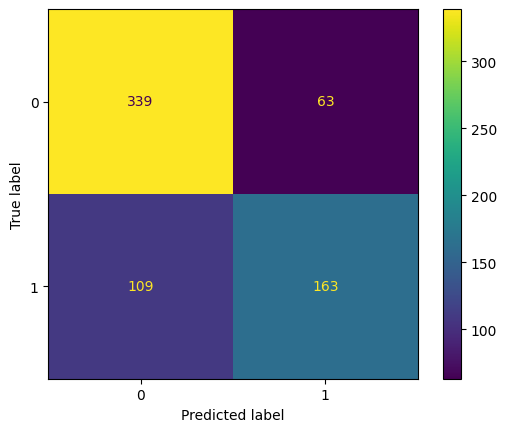

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.744807121661721

### Probando con 5 componentes principales

Mejor hiper-param conf. {'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.005, 'momentum': 0.9}


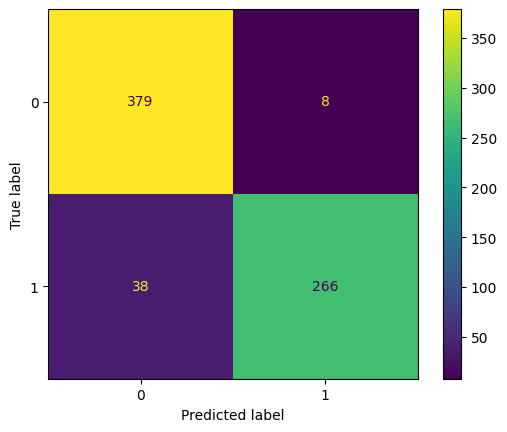

0.93

In [32]:
pca = PCA(n_components = 5)
X2D = pca.fit_transform(X)

X_train, X_test = train_test_split(X, test_size=0.15, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.15, random_state=42)
y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
model.fit(X_train_scaled, y_train)
print("Mejor hiper-param conf.", model.best_params_)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

round(accuracy_score(y_test, y_pred), 2)

In [33]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))